<a href="https://colab.research.google.com/github/Nazarshia2889/AutomatedEssayGrader/blob/main/notebooks/AutomatedEssayGrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as og # read feather does not work with modin pandas
import modin.pandas as pd # faster multithreaded version of pandas (i think) - noticeable difference when using apply() method
import swifter # speed up pandas apply

# from tqdm import tqdm # progress indicator for pandas operations
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import RegexpTokenizer

import enchant

%matplotlib inline

tqdm.pandas()

In [2]:
df = og.read_feather('data/processed.feather')
df.columns

# essay_id: A unique identifier for each individual student essay
# essay_set: 1-8, an id for each set of essays
# essay: The ascii text of a student's response
# rater1_domain1: Rater 1's domain 1 score; all essays have this
# rater2_domain1: Rater 2's domain 1 score; all essays have this
# rater3_domain1: Rater 3's domain 1 score; only some essays in set 8 have this.
# domain1_score: Resolved score between the raters; all essays have this
# rater1_domain2: Rater 1's domain 2 score; only essays in set 2 have this
# rater2_domain2: Rater 2's domain 2 score; only essays in set 2 have this
# domain2_score: Resolved score between the raters; only essays in set 2 have this
# rater1_trait1 score - rater3_trait6 score: trait scores for sets 7-8

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'misspelled'],
      dtype='object')

# Sample Essay and Score

In [4]:
# domain1_score is the sum of 1 and 2
df[['essay', 'rater1_domain1', 'rater2_domain1', 'rater3_domain1', 'domain1_score']].iloc[[0, 1, 2]]

,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score
0,"Dear local newspaper, I think effects computer...",4,4,NaN,8
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7


# Score Distribution

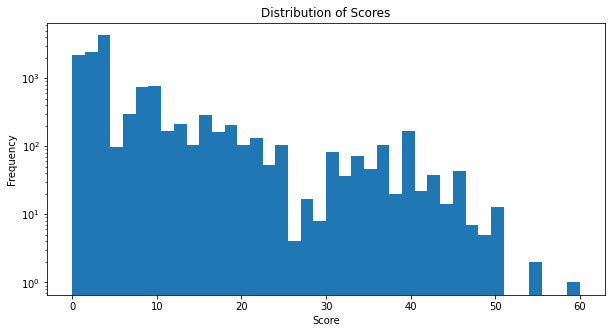

In [5]:
scores = df['domain1_score'].values

# create a histogram of scores
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(scores, bins=40)

# title the graph
ax.set_title('Distribution of Scores')

# label the x and y axes
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')

# logarithmic scale on the y axis
ax.set_yscale('log')

fig.savefig('images/domain1_score_histogram.svg')

fig.show()

# Scoring Discrepancies

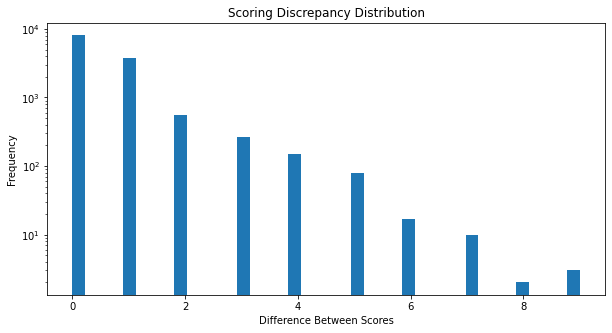

In [6]:
scorea = df['rater1_domain1'].values
scoreb = df['rater2_domain1'].values

differences = abs(scorea - scoreb)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(differences, bins=40)

# title the graph
ax.set_title('Scoring Discrepancy Distribution')

# label the x and y axes
ax.set_xlabel('Difference Between Scores')
ax.set_ylabel('Frequency')

# logarithmic scale on the y axis
ax.set_yscale('log')

fig.savefig('images/domain1_score_discrepancy_histogram.svg')

# Misspellings

In [3]:
misspellings = df['misspelled'].values

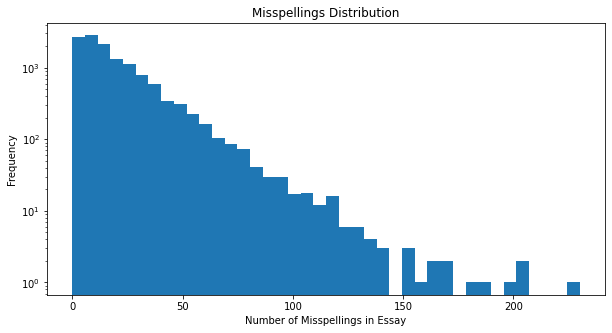

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(misspellings, bins=40)

# title the graph
ax.set_title('Misspellings Distribution')

# label the x and y axes
ax.set_xlabel('Number of Misspellings in Essay')
ax.set_ylabel('Frequency')

# logarithmic scale on the y axis
ax.set_yscale('log')

fig.savefig('images/misspellings_histogram.svg')